In [18]:
import pint
si = pint.UnitRegistry()

In [19]:
from matplotlib import pyplot
si.setup_matplotlib()

In [20]:
%run mpdata.ipynb

In [21]:
%run coord.ipynb

In [22]:
def plot_done():
    pyplot.grid()
    pyplot.legend()
    
def plot_step(r, psi, t):
    pyplot.step(r, psi, linestyle='-', where='mid', label=str(t))

In [23]:
nr = 128
nt = 256
dt = .25 * si.second
r_min = 1 * si.micrometre
r_max = 100 * si.micrometre
r_mid = r_min + .4*(r_max - r_min) 
psi0 = lambda r: 1 / ((r-r_mid)**2 + 1 * r_mid.units**2)
drdt = lambda r: .1 * si.micrometre / si.second


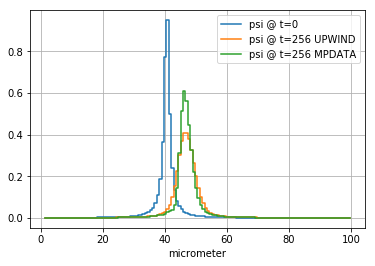

In [25]:
algos = (
    MPDATA(nr, r_min, r_max, dt, psi0, x_id(si), {"n_it":1}),
    MPDATA(nr, r_min, r_max, dt, psi0, x_id(si), {"n_it":2, "dfl":False})
)

plot_step(algos[0].r, algos[0].psi, "psi @ t=0")

for algo in algos:
    for t in range(nt): 
        algo.step(drdt)

plot_step(algos[0].r, algos[0].psi, "psi @ t=" + str(nt) + " UPWIND")
plot_step(algos[1].r, algos[1].psi, "psi @ t=" + str(nt) + " MPDATA")
plot_done()

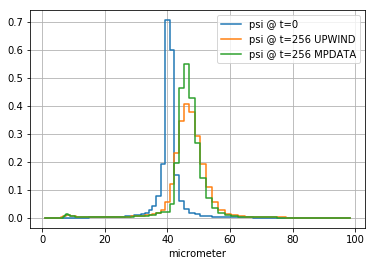

In [28]:
algos = (
    MPDATA(nr, r_min, r_max, dt, psi0, x_ln(si), {"n_it":1}),
    MPDATA(nr, r_min, r_max, dt, psi0, x_ln(si), {"n_it":2, "dfl":False})
)

plot_step(algos[0].r, algos[0].psi, "psi @ t=0")

for algo in algos:
    for t in range(nt): 
        algo.step(drdt)

plot_step(algos[0].r, algos[0].psi, "psi @ t=" + str(nt) + " UPWIND")
plot_step(algos[1].r, algos[1].psi, "psi @ t=" + str(nt) + " MPDATA")
plot_done()

